**NMDS PROJECT**


---


**Members:**

**1) Mahmood Topiwala - 202318030**

**2) Anurag Shukla   -  202318039**

**3) Vrishmi Parikh - 202318013**

**4) Tanaz Pathan - 202318056**

**Eigen-portfolio construction using Principal Component Analysis (PCA)**

In [ ]:
import os
import os.path
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# load dataset
asset_prices = pd.read_csv('/content/spx_holdings_and_spx_closeprice.csv',
                     date_parser=lambda dt: pd.to_datetime(dt, format='%Y-%m-%d'),
                     index_col = 0).dropna()
n_stocks_show = 12
print('Asset prices shape', asset_prices.shape)
asset_prices.iloc[:, :n_stocks_show].head()

<ipython-input-21-46780e52a8d5>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  asset_prices = pd.read_csv('/content/spx_holdings_and_spx_closeprice.csv',


Asset prices shape (3493, 419)


,A,AA,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP
2000-01-27,46.1112,78.9443,3.9286,4.5485,13.7898,15.6719,48.0313,10.8844,39.5477,8.1250,32.9375,33.5625
2000-01-28,45.8585,77.8245,3.6295,4.5485,14.2653,14.3906,47.7500,10.7143,38.5627,7.7188,32.3125,33.0000
2000-01-31,44.5952,78.0345,3.7054,4.3968,14.5730,13.7656,46.7500,10.6576,37.3807,7.6406,32.5625,33.5000
2000-02-01,47.8377,80.7640,3.5804,4.5333,14.7128,13.9688,49.0000,10.8844,37.9717,7.9219,32.5625,33.6875
2000-02-02,51.5434,83.4934,3.5290,4.5788,14.7968,15.3281,48.1250,10.6576,35.9032,7.9688,32.5625,33.6250


In [ ]:
print('Last column contains SPX index prices:')
asset_prices.iloc[:, -10:].head()

Last column contains SPX index prices:


,STJ,SVU,SWY,TEG,TER,TGNA,THC,X,MAR.1,SPX
2000-01-27,5.5918,86.6178,26.3983,11.3873,65.8677,22.1921,60.9705,20.7086,12.2457,1398.56
2000-01-28,5.4520,82.4218,27.4137,11.2230,60.3487,21.7558,62.3032,20.1183,12.0742,1360.16
2000-01-31,5.5499,86.3181,28.2444,11.0862,62.1484,22.0533,60.6373,19.5772,12.1722,1394.46
2000-02-01,5.4240,83.0212,28.7982,11.1683,67.3674,22.2120,60.4708,19.5772,12.5151,1409.28
2000-02-02,5.3541,81.5226,28.6136,11.1956,68.9271,22.6483,62.4698,19.5281,12.3192,1409.12


**Part 1 (Asset Returns Calculation)**

Calculate percent returns, also known as simple returns using asset_prices, assign the result to variable asset_returns. Keep only not-nan values in the resulting pandas.DataFrame

Calculate de-meaned returns and scale them by standard deviation
. Assign result to normed_returns variable

We now compute stock returns and normalize stock returns data by subtracting the mean and dividing by standard diviation. This normalization is required by PCA.

In [ ]:
#Part 1 (Asset Returns Calculation)

asset_returns = pd.DataFrame(data=np.zeros(shape=(len(asset_prices.index), asset_prices.shape[1])),
                             columns=asset_prices.columns.values,
                             index=asset_prices.index)
normed_returns = asset_returns

# Calculate percent returns, also known as simple returns using asset prices.
# Keep only not-nan values in the resulting pandas.DataFrame
asset_returns = asset_prices.pct_change().dropna()

# Compute stock returns and normalize stock returns data by subtracting the mean and dividing by standard diviation. This normalization is required by PCA.
normed_returns = (asset_returns - asset_returns.mean()) / asset_returns.std()

normed_returns.iloc[-5:, -10:].head()

,STJ,SVU,SWY,TEG,TER,TGNA,THC,X,MAR.1,SPX
2013-12-16,0.852722,0.965219,-1.168885,0.884751,0.095865,0.656639,0.180014,-0.238498,0.465047,0.467931
2013-12-17,0.275173,0.517307,-0.086106,-0.306213,0.589689,-0.118610,-0.549523,0.025268,-0.260013,-0.247921
2013-12-18,0.864485,0.509435,0.600714,1.210605,-0.190024,0.925461,0.756998,0.058428,0.952458,1.252703
2013-12-19,0.210069,0.399574,-0.100159,-0.757419,-0.208023,0.304913,-0.772205,1.544228,-0.167775,-0.056358
2013-12-20,0.827306,0.748420,0.372443,1.048113,0.264046,0.436874,0.320641,-0.740854,0.373717,0.353859


In [ ]:
#1 result normalized returns
normed_returns.iloc[0,: 100].values.squeeze()

array([-0.19005437, -0.51371017, -2.71470869, -0.04977943,  2.18293305,
       -2.68413088, -0.21246093, -0.76699639, -1.5407309 , -1.80394666,
       -1.37299129, -0.99416907,  0.16136183,  0.72980366,  0.63485621,
       -0.72131907, -0.01302927, -0.80797756,  0.39923062, -0.75893259,
       -1.43444651, -1.12783867, -1.29385343, -0.44802859, -2.13973399,
        0.58949813, -0.87826364,  0.31428572, -1.08060243, -0.31367868,
        0.11819333, -1.8686777 , -1.87275168, -0.22608376, -0.04189121,
       -0.02136145, -0.60458719, -1.43087396, -1.16679677, -1.65594274,
       -0.50493241, -1.5196492 , -0.36359946, -0.58859176, -0.73289901,
        0.87654672, -3.12410596, -1.33977245, -1.33866029, -0.53051976,
       -1.28309222, -2.2171311 ,  1.75785074,  0.22815795, -0.48093428,
       -0.21160476, -1.39163378, -1.8907977 , -1.26523275, -0.90790361,
        1.20007622, -1.13783598, -1.06735573, -1.49029484,  1.65191927,
       -0.94841616,  3.36936561, -0.82344479,  1.76591258,  0.04

In [ ]:
train_end = datetime.datetime(2008, 3, 26)

df_train = None
df_test = None
df_raw_train = None
df_raw_test = None

df_train = normed_returns[normed_returns.index <= train_end].copy()
df_test = normed_returns[normed_returns.index > train_end].copy()

df_raw_train = asset_returns[asset_returns.index <= train_end].copy()
df_raw_test = asset_returns[asset_returns.index > train_end].copy()

print('Train dataset:', df_train.shape)
print('Test dataset:', df_test.shape)

Train dataset: (2047, 419)
Test dataset: (1445, 419)


In [ ]:
train_end = datetime.datetime(2012, 3, 26)

df_train = None
df_test = None
df_raw_train = None
df_raw_test = None

df_train = normed_returns[normed_returns.index <= train_end].copy()
df_test = normed_returns[normed_returns.index > train_end].copy()

df_raw_train = asset_returns[asset_returns.index <= train_end].copy()
df_raw_test = asset_returns[asset_returns.index > train_end].copy()

print('Train dataset:', df_train.shape)
print('Test dataset:', df_test.shape)

Train dataset: (3055, 419)
Test dataset: (437, 419)


**Part 2 (PCA fitting)**

Calculate covariance matrix using training data set, i.e. df_train for all assets. Assign results to cov_matrix.
Calculate covariance matrix using training data set, i.e. df_raw_train for all assets. Assign results to cov_matrix_raw.
Use scikit-learn PCA to fit PCA model to cov_matrix. Assign fitted model to pca

In [ ]:
import sklearn.decomposition
import seaborn as sns

stock_tickers = normed_returns.columns.values[:-1]
assert 'SPX' not in stock_tickers, "By accident included SPX index"

n_tickers = len(stock_tickers)
pca = None
cov_matrix = pd.DataFrame(data=np.ones(shape=(n_tickers, n_tickers)), columns=stock_tickers)
cov_matrix_raw = cov_matrix

if df_train is not None and df_raw_train is not None:
    stock_tickers = asset_returns.columns.values[:-1]
    assert 'SPX' not in stock_tickers, "By accident included SPX index"

    #normed covariance matrix
    cov_matrix = df_train.loc[:, df_train.columns != 'SPX'].cov()

    # computing PCA on S&P 500 stocks
    from sklearn.decomposition import PCA
    pca = PCA().fit(cov_matrix)

    # not normed covariance matrix
    cov_matrix_raw = df_raw_train.loc[:, df_raw_train.columns != 'SPX'].cov()

    cov_raw_df = pd.DataFrame({'Variance': np.diag(cov_matrix_raw)}, index=stock_tickers)

    # cumulative variance explained
    var_threshold = 0.8
    var_explained = np.cumsum(pca.explained_variance_ratio_)
    num_comp = np.where(np.logical_not(var_explained < var_threshold))[0][0] + 1  # +1 due to zero based-arrays
    print('%d components explain %.2f%% of variance' %(num_comp, 100* var_threshold))

5 components explain 80.00% of variance


In [ ]:
import sklearn.decomposition
import seaborn as sns

stock_tickers = normed_returns.columns.values[:-1]
assert 'SPX' not in stock_tickers, "By accident included SPX index"

n_tickers = len(stock_tickers)
pca = None
cov_matrix = pd.DataFrame(data=np.ones(shape=(n_tickers, n_tickers)), columns=stock_tickers)
cov_matrix_raw = cov_matrix

if df_train is not None and df_raw_train is not None:
    stock_tickers = asset_returns.columns.values[:-1]
    assert 'SPX' not in stock_tickers, "By accident included SPX index"

    #normed covariance matrix
    cov_matrix = df_train.loc[:, df_train.columns != 'SPX'].cov()

    # computing PCA on S&P 500 stocks
    from sklearn.decomposition import PCA
    pca = PCA().fit(cov_matrix)

    # not normed covariance matrix
    cov_matrix_raw = df_raw_train.loc[:, df_raw_train.columns != 'SPX'].cov()

    cov_raw_df = pd.DataFrame({'Variance': np.diag(cov_matrix_raw)}, index=stock_tickers)

    # cumulative variance explained
    var_threshold = 0.8
    var_explained = np.cumsum(pca.explained_variance_ratio_)
    num_comp = np.where(np.logical_not(var_explained < var_threshold))[0][0] + 1  # +1 due to zero based-arrays
    print('%d components explain %.2f%% of variance' %(num_comp, 100* var_threshold))

4 components explain 80.00% of variance


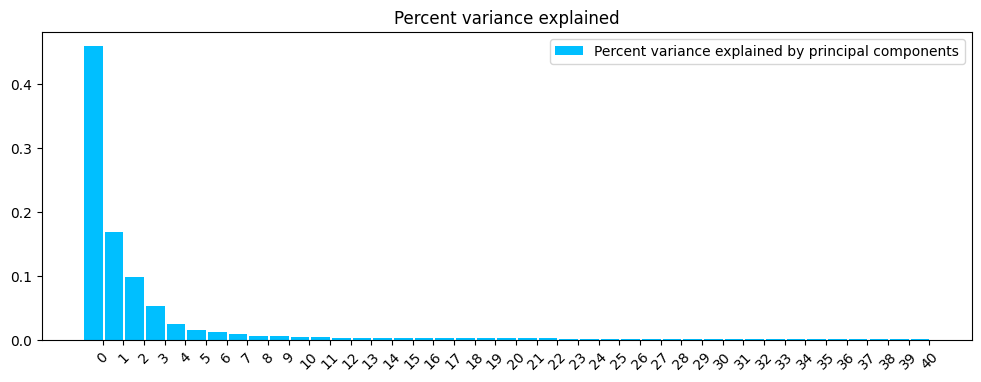

In [ ]:
if pca is not None:
    bar_width = 0.9
    n_asset = int((1 / 10) * normed_returns.shape[1])
    x_indx = np.arange(n_asset)
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    # Eigenvalues are measured as percentage of explained variance.
    rects = ax.bar(x_indx, pca.explained_variance_ratio_[:n_asset], bar_width, color='deepskyblue')
    ax.set_xticks(x_indx + bar_width / 2)
    ax.set_xticklabels(list(range(n_asset)), rotation=45)
    ax.set_title('Percent variance explained')
    ax.legend((rects[0],), ('Percent variance explained by principal components',))

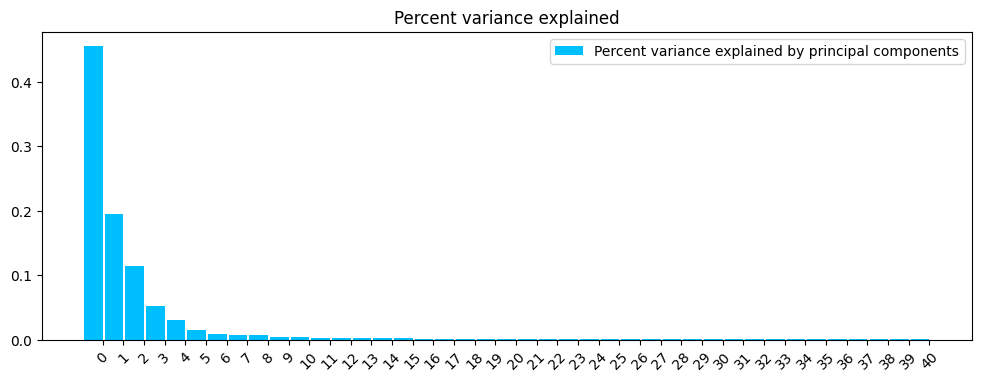

In [ ]:
if pca is not None:
    bar_width = 0.9
    n_asset = int((1 / 10) * normed_returns.shape[1])
    x_indx = np.arange(n_asset)
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    # Eigenvalues are measured as percentage of explained variance.
    rects = ax.bar(x_indx, pca.explained_variance_ratio_[:n_asset], bar_width, color='deepskyblue')
    ax.set_xticks(x_indx + bar_width / 2)
    ax.set_xticklabels(list(range(n_asset)), rotation=45)
    ax.set_title('Percent variance explained')
    ax.legend((rects[0],), ('Percent variance explained by principal components',))

In [ ]:
if pca is not None:
    projected = pca.fit_transform(cov_matrix)

**Part 3 (Eigen-portfolios construction)**

We now look at the first two eigen portfolios. We use definition of eigen portfolios as provided by Avellaneda http://math.nyu.edu/faculty/avellane/AvellanedaLeeStatArb20090616.pdf

Following Avellaneda we define eigen portfolio weights as:
$$q_i(j) = \frac{v_i(j)}{ \sigma(i)}$$

$$\text{where} \quad j \quad
\text{is the index of eigen portfolio and} \quad v_i \quad
 \text{is the i-th element of j-th eigen vector.}$$

In the code the pca.components_ are the Principal axes in feature space, representing the directions of maximum variance in the data. The components are sorted by explained_variance_.


<ipython-input-69-bb6a14a18dc1>:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Sum of weights of first eigen-portfolio: %.2f' % np.sum(eigen_prtf1))


Sum of weights of first eigen-portfolio: 100.00


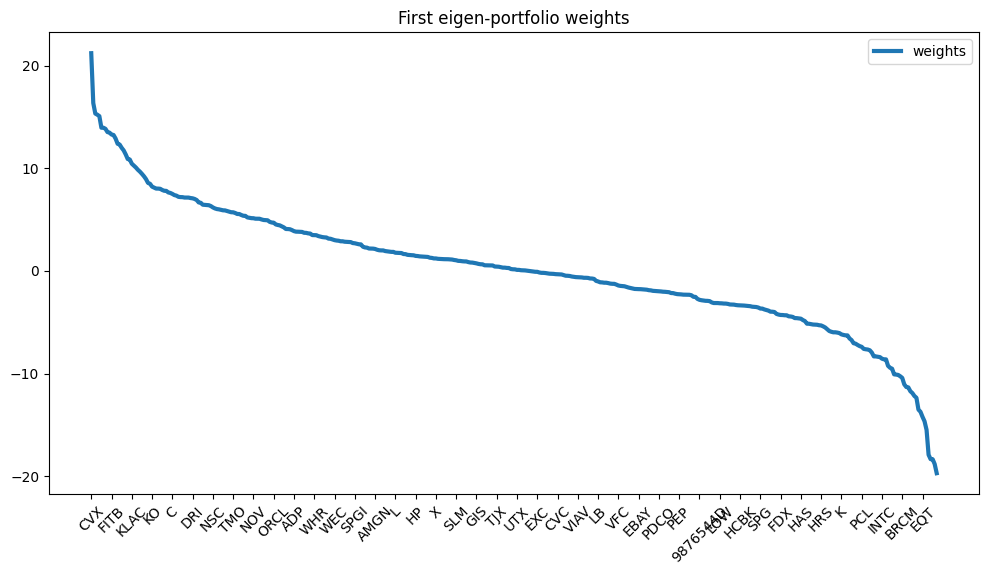

In [ ]:
# the first two eigen-portfolio weights
# first component
# get the Principal components
pc_w = np.zeros(len(stock_tickers))
eigen_prtf1 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
if pca is not None:
    pcs = pca.components_

    # normalized to 1
    pc_w = pcs[:, 0] / sum(pcs[:, 0])

    eigen_prtf1 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
    eigen_prtf1.sort_values(by=['weights'], ascending=False, inplace=True)
    print('Sum of weights of first eigen-portfolio: %.2f' % np.sum(eigen_prtf1))
    eigen_prtf1.plot(title='First eigen-portfolio weights',
                     figsize=(12,6),
                     xticks=range(0, len(stock_tickers),10),
                     rot=45,
                     linewidth=3)

<ipython-input-29-7f81fcc9477c>:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Sum of weights of first eigen-portfolio: %.2f' % np.sum(eigen_prtf1))


Sum of weights of first eigen-portfolio: 100.00


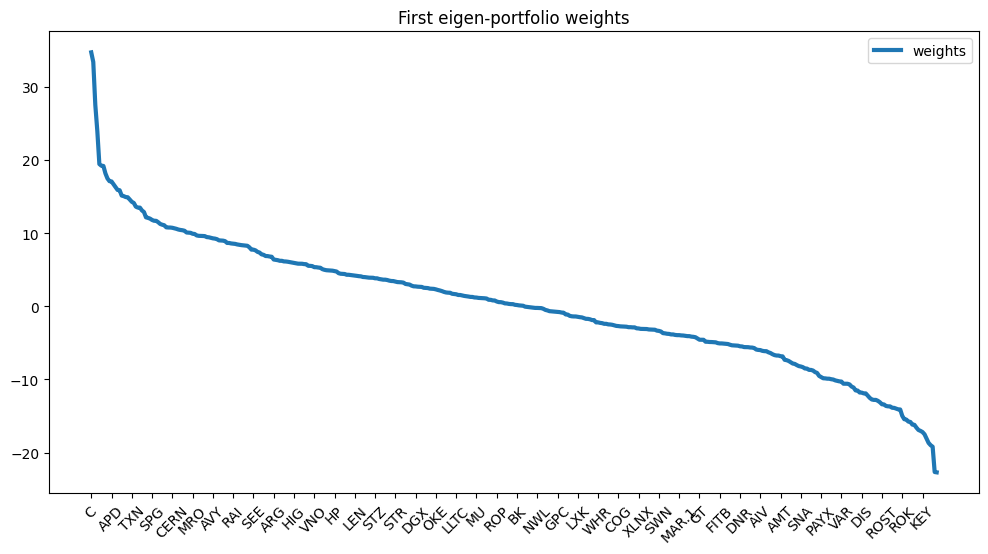

In [ ]:
# the first two eigen-portfolio weights# the fi
# first component
# get the Principal components
pc_w = np.zeros(len(stock_tickers))
eigen_prtf1 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
if pca is not None:
    pcs = pca.components_

    # normalized to 1
    pc_w = pcs[:, 0] / sum(pcs[:, 0])

    eigen_prtf1 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
    eigen_prtf1.sort_values(by=['weights'], ascending=False, inplace=True)
    print('Sum of weights of first eigen-portfolio: %.2f' % np.sum(eigen_prtf1))
    eigen_prtf1.plot(title='First eigen-portfolio weights',
                     figsize=(12,6),
                     xticks=range(0, len(stock_tickers),10),
                     rot=45,
                     linewidth=3)

<ipython-input-70-2eeba41a7e8d>:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Sum of weights of second eigen-portfolio: %.2f' % np.sum(eigen_prtf2))


Sum of weights of second eigen-portfolio: 100.00


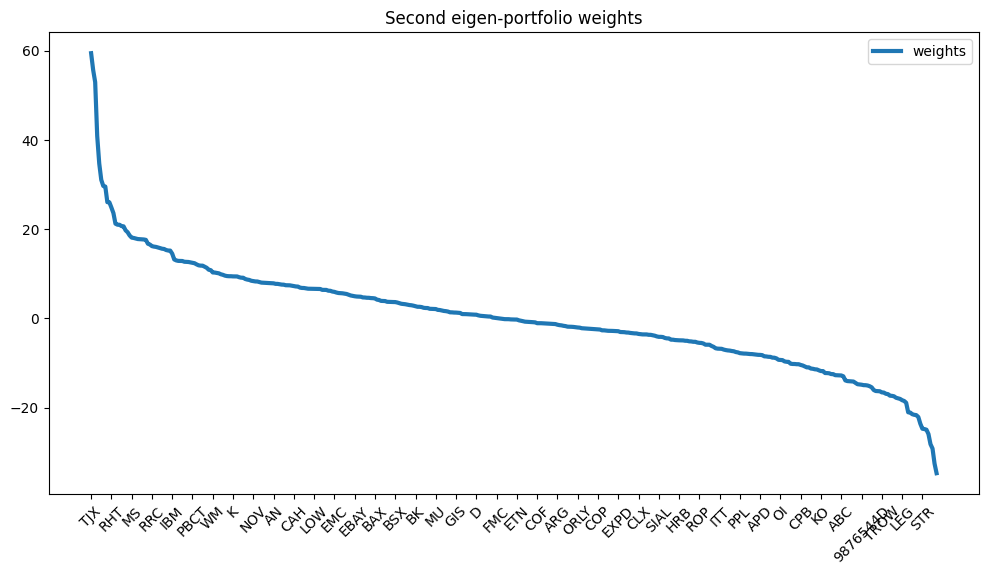

In [ ]:
pc_w = np.zeros(len(stock_tickers))
eigen_prtf2 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)

if pca is not None:
    pcs = pca.components_

    # normalized to 1
    pc_w = pcs[:, 1] / sum(pcs[:, 1])

    eigen_prtf2 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
    eigen_prtf2.sort_values(by=['weights'], ascending=False, inplace=True)
    print('Sum of weights of second eigen-portfolio: %.2f' % np.sum(eigen_prtf2))
    eigen_prtf2.plot(title='Second eigen-portfolio weights',
                     figsize=(12,6),
                     xticks=range(0, len(stock_tickers),10),
                     rot=45,
                     linewidth=3)

<ipython-input-30-aa33fe7d022e>:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Sum of weights of second eigen-portfolio: %.2f' % np.sum(eigen_prtf2))


Sum of weights of second eigen-portfolio: 100.00


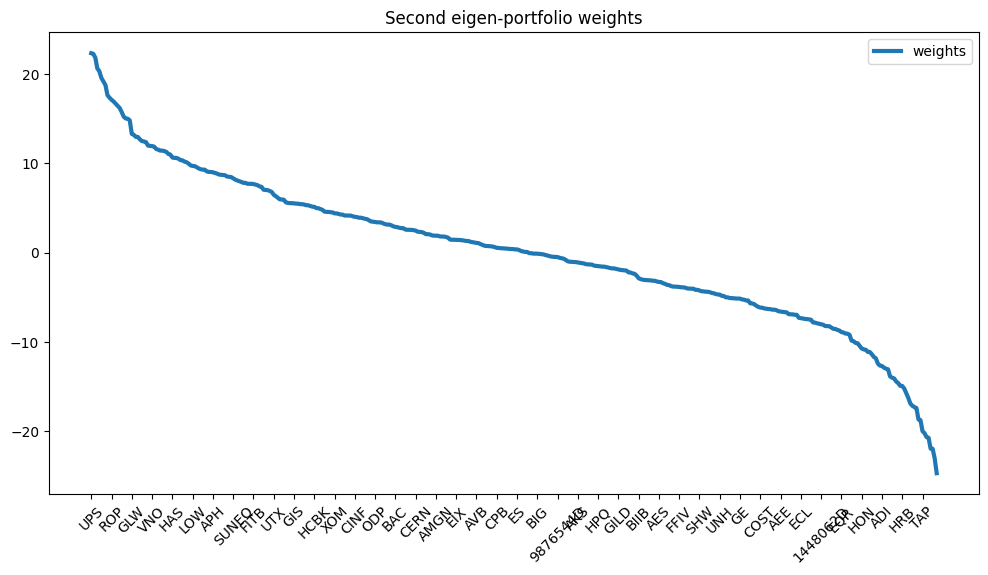

In [ ]:
pc_w = np.zeros(len(stock_tickers))
eigen_prtf2 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)

if pca is not None:
    pcs = pca.components_

    # normalized to 1
    pc_w = pcs[:, 1] / sum(pcs[:, 1])

    eigen_prtf2 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
    eigen_prtf2.sort_values(by=['weights'], ascending=False, inplace=True)
    print('Sum of weights of second eigen-portfolio: %.2f' % np.sum(eigen_prtf2))
    eigen_prtf2.plot(title='Second eigen-portfolio weights',
                     figsize=(12,6),
                     xticks=range(0, len(stock_tickers),10),
                     rot=45,
                     linewidth=3)

**Part 4 (Compute performance of several eigen portfolios)**

Implement sharpe_ratio() function. The function takes ts_returns argument of type pd.Series and returns a tuple of annualized return, annualized vol, and annualized sharpe ratio, where sharpe ratio is defined as annualized return divided by annualized volatility
find portfolio (an index into sharpe_metric) that has the highest sharpe ratio

In [ ]:
def sharpe_ratio(ts_returns, periods_per_year=252):
    """
    sharpe_ratio - Calculates annualized return, annualized vol, and annualized sharpe ratio,
                    where sharpe ratio is defined as annualized return divided by annualized volatility

    Arguments:
    ts_returns - pd.Series of returns of a single eigen portfolio

    Return:
    a tuple of three doubles: annualized return, volatility, and sharpe ratio
    """

    annualized_return = 0.
    annualized_vol = 0.
    annualized_sharpe = 0.

    n_years = ts_returns.shape[0] / periods_per_year
    annualized_return = np.power(np.prod(1 + ts_returns), ( 1 / n_years)) - 1
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

We compute the annualized return, volatility, and Sharpe ratio of the first two eigen portfolios.



First eigen-portfolio:
Return = -12.89%
Volatility = 55.30%
Sharpe = -0.23


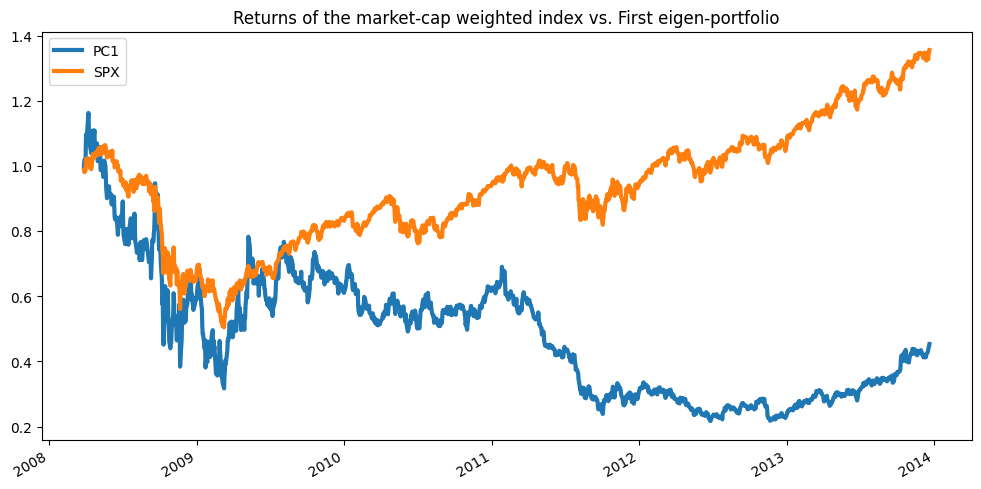

In [ ]:
if df_raw_test is not None:
    eigen_prtf1_returns = np.dot(df_raw_test.loc[:, eigen_prtf1.index], eigen_prtf1 / 100)
    eigen_prtf1_returns = pd.Series(eigen_prtf1_returns.squeeze(), index=df_test.index)
    er, vol, sharpe = sharpe_ratio(eigen_prtf1_returns)
    print('First eigen-portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (er*100, vol*100, sharpe))
    year_frac = (eigen_prtf1_returns.index[-1] - eigen_prtf1_returns.index[0]).days / 252

    df_plot = pd.DataFrame({'PC1': eigen_prtf1_returns, 'SPX': df_raw_test.loc[:, 'SPX']}, index=df_test.index)
    np.cumprod(df_plot + 1).plot(title='Returns of the market-cap weighted index vs. First eigen-portfolio',
                             figsize=(12,6), linewidth=3)

First eigen-portfolio:
Return = 42.98%
Volatility = 33.66%
Sharpe = 1.28


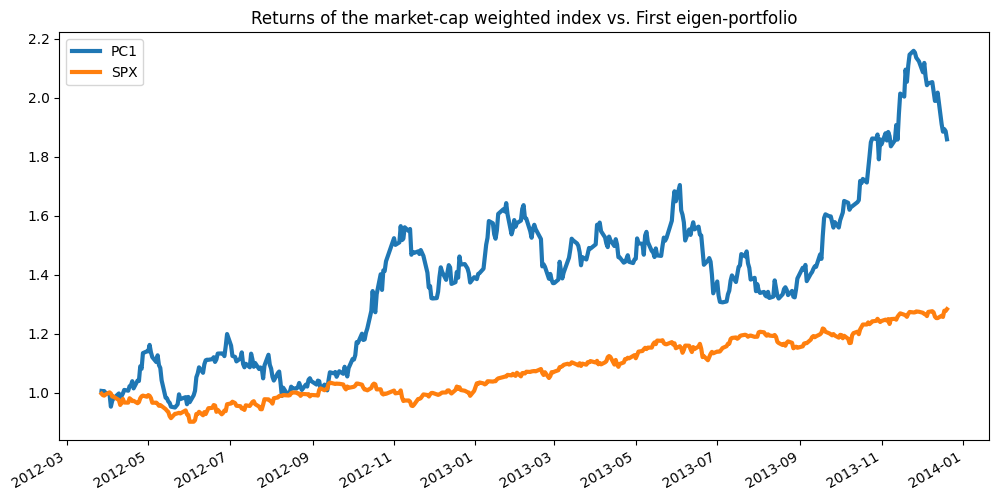

In [ ]:
if df_raw_test is not None:
    eigen_prtf1_returns = np.dot(df_raw_test.loc[:, eigen_prtf1.index], eigen_prtf1 / 100)
    eigen_prtf1_returns = pd.Series(eigen_prtf1_returns.squeeze(), index=df_test.index)
    er, vol, sharpe = sharpe_ratio(eigen_prtf1_returns)
    print('First eigen-portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (er*100, vol*100, sharpe))
    year_frac = (eigen_prtf1_returns.index[-1] - eigen_prtf1_returns.index[0]).days / 252

    df_plot = pd.DataFrame({'PC1': eigen_prtf1_returns, 'SPX': df_raw_test.loc[:, 'SPX']}, index=df_test.index)
    np.cumprod(df_plot + 1).plot(title='Returns of the market-cap weighted index vs. First eigen-portfolio',
                             figsize=(12,6), linewidth=3)

In [ ]:
if df_raw_test is not None:
    eigen_prtf2_returns = np.dot(df_raw_test.loc[:, eigen_prtf2.index], eigen_prtf2 / 100)
    eigen_prtf2_returns = pd.Series(eigen_prtf2_returns.squeeze(), index=df_test.index)
    er, vol, sharpe = sharpe_ratio(eigen_prtf2_returns)
    print('Second eigen-portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (er*100, vol*100, sharpe))

Second eigen-portfolio:
Return = 10.42%
Volatility = 72.44%
Sharpe = 0.14


In [ ]:
if df_raw_test is not None:
    eigen_prtf2_returns = np.dot(df_raw_test.loc[:, eigen_prtf2.index], eigen_prtf2 / 100)
    eigen_prtf2_returns = pd.Series(eigen_prtf2_returns.squeeze(), index=df_test.index)
    er, vol, sharpe = sharpe_ratio(eigen_prtf2_returns)
    print('Second eigen-portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (er*100, vol*100, sharpe))

Second eigen-portfolio:
Return = 17.57%
Volatility = 35.37%
Sharpe = 0.50


We repeat the exercise of computing Sharpe ratio for the first N portfolios and select portfolio with the highest postive Sharpe ratio.



<ipython-input-31-61fcb2784d01>:18: RuntimeWarning: invalid value encountered in power
  annualized_return = np.power(np.prod(1 + ts_returns), ( 1 / n_years)) - 1
<ipython-input-31-61fcb2784d01>:18: RuntimeWarning: invalid value encountered in power
  annualized_return = np.power(np.prod(1 + ts_returns), ( 1 / n_years)) - 1


Eigen portfolio #6 with the highest Sharpe. Return 27078580430.48%, vol = 3032.95%, Sharpe = 8928132.12


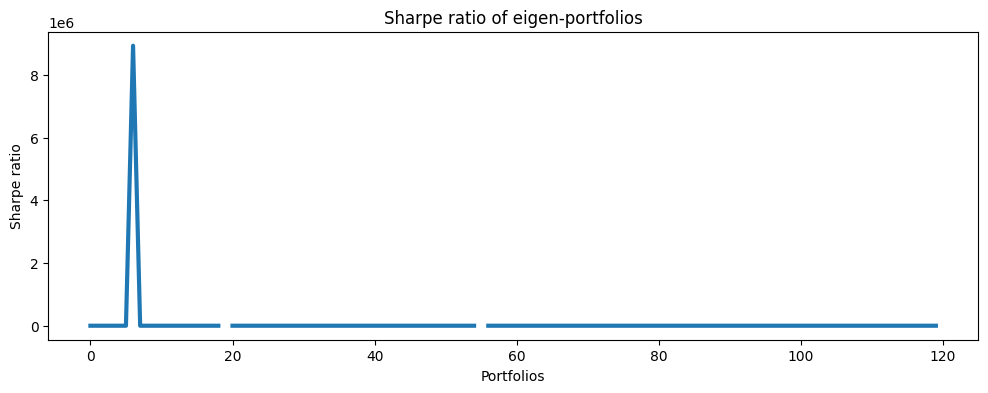

In [ ]:
n_portfolios = 120
annualized_ret = np.array([0.] * n_portfolios)
sharpe_metric = np.array([0.] * n_portfolios)
annualized_vol = np.array([0.] * n_portfolios)
idx_highest_sharpe = 0 # index into sharpe_metric which identifies a portfolio with rhe highest Sharpe ratio

if pca is not None:
    for ix in range(n_portfolios):

        pc_w = pcs[:, ix] / sum(pcs[:, ix])
        eigen_prtfix = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
        eigen_prtfix.sort_values(by=['weights'], ascending=False, inplace=True)

        eigen_prtix_returns = np.dot(df_raw_test.loc[:, eigen_prtfix.index], eigen_prtfix / 100)
        eigen_prtix_returns = pd.Series(eigen_prtix_returns.squeeze(), index=df_test.index)
        er, vol, sharpe = sharpe_ratio(eigen_prtix_returns)
        annualized_ret[ix] = er
        annualized_vol[ix] = vol
        sharpe_metric[ix] = sharpe


    # find portfolio with the highest Sharpe ratio
    idx_highest_sharpe = np.nanargmax(sharpe_metric)

    print('Eigen portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f' %
          (idx_highest_sharpe,
           annualized_ret[idx_highest_sharpe]*100,
           annualized_vol[idx_highest_sharpe]*100,
           sharpe_metric[idx_highest_sharpe]))

    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    ax.plot(sharpe_metric, linewidth=3)
    ax.set_title('Sharpe ratio of eigen-portfolios')
    ax.set_ylabel('Sharpe ratio')
    ax.set_xlabel('Portfolios')

<ipython-input-13-68d2f603a80d>:18: RuntimeWarning: invalid value encountered in power
  annualized_return = np.power(np.prod(1 + ts_returns),(1 / n_years)) - 1
<ipython-input-13-68d2f603a80d>:18: RuntimeWarning: invalid value encountered in power
  annualized_return = np.power(np.prod(1 + ts_returns),(1 / n_years)) - 1
<ipython-input-13-68d2f603a80d>:18: RuntimeWarning: invalid value encountered in power
  annualized_return = np.power(np.prod(1 + ts_returns),(1 / n_years)) - 1
<ipython-input-13-68d2f603a80d>:18: RuntimeWarning: invalid value encountered in power
  annualized_return = np.power(np.prod(1 + ts_returns),(1 / n_years)) - 1


Eigen portfolio #85 with the highest Sharpe. Return 43.05%, vol = 68.85%, Sharpe = 0.63


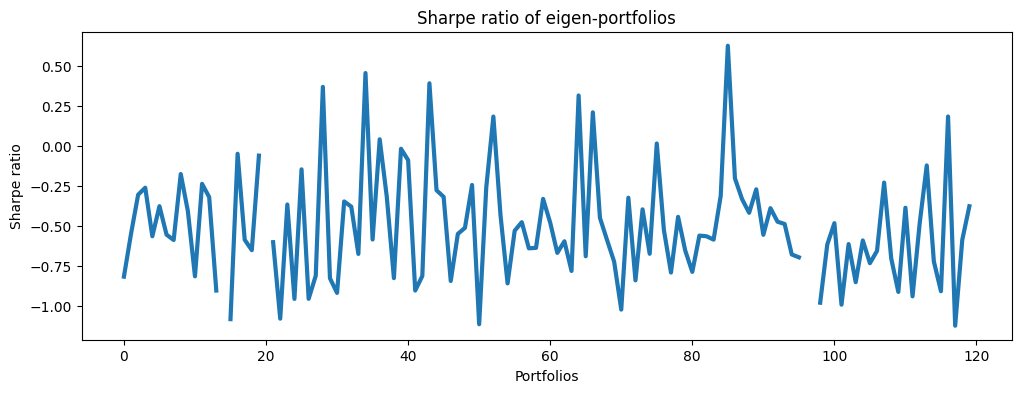

In [ ]:
n_portfolios = 120
annualized_ret = np.array([0.] * n_portfolios)
sharpe_metric = np.array([0.] * n_portfolios)
annualized_vol = np.array([0.] * n_portfolios)
idx_highest_sharpe = 0 # index into sharpe_metric which identifies a portfolio with rhe highest Sharpe ratio

if pca is not None:
    for ix in range(n_portfolios):

        pc_w = pcs[:, ix] / sum(pcs[:, ix])
        eigen_prtfix = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
        eigen_prtfix.sort_values(by=['weights'], ascending=False, inplace=True)

        eigen_prtix_returns = np.dot(df_raw_test.loc[:, eigen_prtfix.index], eigen_prtfix / 100)
        eigen_prtix_returns = pd.Series(eigen_prtix_returns.squeeze(), index=df_test.index)
        er, vol, sharpe = sharpe_ratio(eigen_prtix_returns)
        annualized_ret[ix] = er
        annualized_vol[ix] = vol
        sharpe_metric[ix] = sharpe


    # find portfolio with the highest Sharpe ratio
    idx_highest_sharpe = np.nanargmax(sharpe_metric)

    print('Eigen portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f' %
          (idx_highest_sharpe,
           annualized_ret[idx_highest_sharpe]*100,
           annualized_vol[idx_highest_sharpe]*100,
           sharpe_metric[idx_highest_sharpe]))

    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    ax.plot(sharpe_metric, linewidth=3)
    ax.set_title('Sharpe ratio of eigen-portfolios')
    ax.set_ylabel('Sharpe ratio')
    ax.set_xlabel('Portfolios')

C:\Users\Paul\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in power
Eigen portfolio #42 with the highest Sharpe. Return 61.14%, vol = 22.80%, Sharpe = 2.68


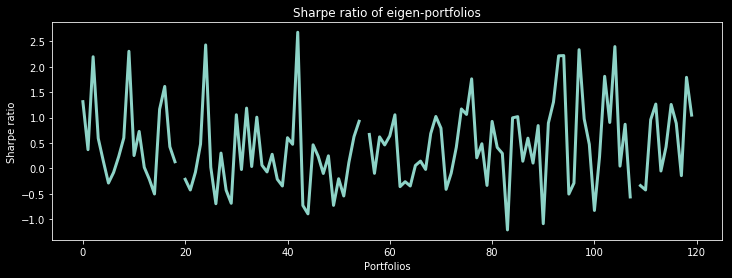

In [ ]:
n_portfolios = 120
annualized_ret = np.array([0.] * n_portfolios)
sharpe_metric = np.array([0.] * n_portfolios)
annualized_vol = np.array([0.] * n_portfolios)
idx_highest_sharpe = 0 # index into sharpe_metric which identifies a portfolio with rhe highest Sharpe ratio

if pca is not None:
    for ix in range(n_portfolios):

        pc_w = pcs[:, ix] / sum(pcs[:, ix])
        eigen_prtfix = pd.DataFrame(data = {'weights': pc_w.squeeze()* 100 }, index = stock_tickers)
        eigen_prtfix.sort_values(by=['weights'], ascending=False, inplace=True)

        eigen_prtix_returns = np.dot(df_raw_test.loc[:, eigen_prtfix.index], eigen_prtfix / 100)
        eigen_prtix_returns = pd.Series(eigen_prtix_returns.squeeze(), index=df_test.index)
        er, vol, sharpe = sharpe_ratio(eigen_prtix_returns)
        annualized_ret[ix] = er
        annualized_vol[ix] = vol
        sharpe_metric[ix] = sharpe

    # find portfolio with the highest Sharpe ratio
    idx_highest_sharpe = np.nanargmax(sharpe_metric)

    print('Eigen portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f' %
          (idx_highest_sharpe,
           annualized_ret[idx_highest_sharpe]*100,
           annualized_vol[idx_highest_sharpe]*100,
           sharpe_metric[idx_highest_sharpe]))

    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    ax.plot(sharpe_metric, linewidth=3)
    ax.set_title('Sharpe ratio of eigen-portfolios')
    ax.set_ylabel('Sharpe ratio')
    ax.set_xlabel('Portfolios')

In [ ]:
results = pd.DataFrame(data={'Return': annualized_ret, 'Vol': annualized_vol, 'Sharpe': sharpe_metric})
results.sort_values(by=['Sharpe'], ascending=False, inplace=True)
results.head(10)

,Return,Vol,Sharpe
42,0.611437,0.228033,2.681354
24,1.032178,0.424530,2.431344
104,0.512464,0.213640,2.398724
97,1.425562,0.609754,2.337929
9,0.753548,0.326692,2.306601
94,0.502025,0.225976,2.221589
93,0.601081,0.271151,2.216774
2,0.453437,0.206247,2.198512
102,0.274142,0.151208,1.813008
118,0.874381,0.487549,1.793422


In [ ]:
results = pd.DataFrame(data={'Return': annualized_ret, 'Vol': annualized_vol, 'Sharpe': sharpe_metric})
results.sort_values(by=['Sharpe'], ascending=False, inplace=True)
results.head(10)

,Return,Vol,Sharpe
85,0.430528,0.688532,0.625284
34,0.287529,0.632700,0.454448
43,0.303231,0.776466,0.390528
28,0.219519,0.596538,0.367987
64,0.607893,1.935163,0.314130
66,0.181576,0.869416,0.208848
116,0.218520,1.194708,0.182906
52,0.072065,0.395083,0.182405
36,0.036192,0.898386,0.040285
75,0.021185,1.507304,0.014055


In [ ]:
results = pd.DataFrame(data={'Return': annualized_ret, 'Vol': annualized_vol, 'Sharpe': sharpe_metric})
results.sort_values(by=['Sharpe'], ascending=False, inplace=True)
results.head(10)

,Return,Vol,Sharpe
105,0.254735,0.317567,0.802145
24,0.249264,0.344224,0.724133
101,0.185158,0.291872,0.634380
71,0.184804,0.316295,0.584277
80,0.185618,0.325733,0.569847
7,0.164728,0.328832,0.500947
12,0.146622,0.301400,0.486469
2,0.154218,0.341197,0.451990
19,0.134695,0.300244,0.448619
69,0.113896,0.266097,0.428026


Return vs Vol

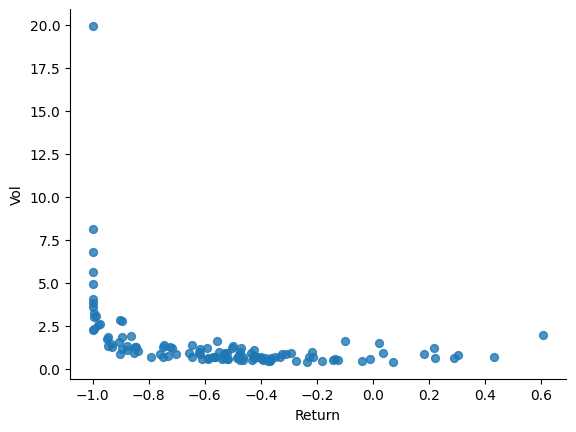

In [ ]:
from matplotlib import pyplot as plt
results.plot(kind='scatter', x='Return', y='Vol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Return Frequency

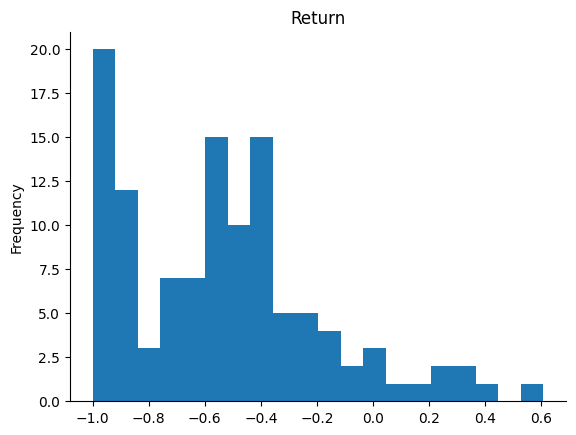

In [ ]:
from matplotlib import pyplot as plt
results['Return'].plot(kind='hist', bins=20, title='Return')
plt.gca().spines[['top', 'right',]].set_visible(False)

Volatility vs Sharpe

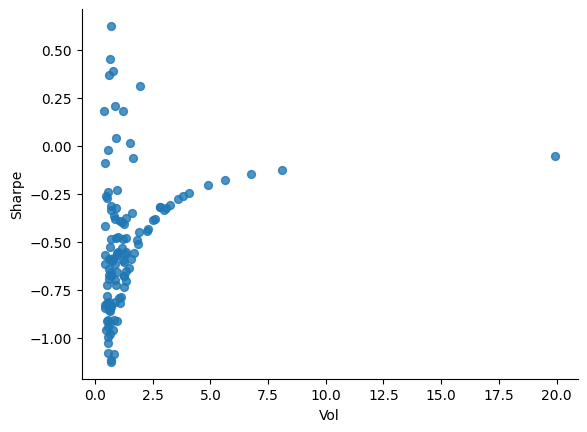

In [ ]:
from matplotlib import pyplot as plt
results.plot(kind='scatter', x='Vol', y='Sharpe', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)